### 시각화 주제: 가격이 비쌀수록 맛있다고 느낄까? (가격대 별 맛집개수)





##### 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
    
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df=pd.read_csv('./data/데이터최종_리뷰제거.csv')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

In [5]:
#최종 맛집 평점 구하기
#별점*맛있다수/리뷰수 - 별점*(2*(별로다수/리뷰수))

rate=(df['별점']*(df['맛있다수']/df['리뷰수']))-(df['별점']*(df['별로다수']/df['리뷰수'])*2)
df['최종평점']=rate
df.head()

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,최종평점
0,도이칠란드 박,4.6,성북구,서울특별시 성북구 솔샘로6길 30-15 1F,다국적음식,만원-2만원,2022-07-04,맛있다,21,19.0,0.0,2.0,3.285714
1,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7,7.0,0.0,0.0,4.600000
2,공푸,4.5,성북구,서울특별시 성북구 삼선교로24길 29,중식,만원 미만,2022-07-07,별로,91,76.0,11.0,4.0,3.362637
3,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41,35.0,6.0,0.0,3.841463
4,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10,10.0,0.0,0.0,4.500000


In [6]:

#df_new['가격대'].value_counts().index
df['가격대'].value_counts().index


# 가격대 칼럼의 결측값 제거
q=df['가격대']=='0'
df[q]
df = df.where(df['가격대'] != '0').dropna()
df = df.where(df['가격대'] != '메뉴').dropna()
df = df.where(df['가격대'] != '주차 무료주차 가능').dropna()
df = df.where(df['가격대'] != '주차 주차공간없음').dropna()




Index([' 만원 미만', ' 만원-2만원', ' 2만원-3만원', ' 4만원 이상', ' 3만원-4만원', '0', '메뉴',
       '주차 무료주차 가능', '주차 주차공간없음'],
      dtype='object')

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,최종평점
123,더허브,3.7,성북구,서울특별시 성북구 인촌로24가길 8,주점,0,2020-10-16,괜찮다,16,11.0,5.0,0.0,2.543750
141,기차순대국,3.6,성북구,서울특별시 성북구 보국문로11길 18-6,한식,0,2021-08-22,맛있다,10,6.0,4.0,0.0,2.160000
307,노천파전,3.6,동대문구,서울특별시 동대문구 회기로28길 3,주점,0,2022-05-08,맛있다,7,4.0,2.0,1.0,1.028571
342,대영식당,0.0,동대문구,서울특별시 동대문구 장한로21길 9,한식,0,2020-03-18,맛있다,2,2.0,0.0,0.0,0.000000
392,가고파설렁탕,3.9,중랑구,서울특별시 중랑구 봉우재로 200,한식,0,2021-07-02,맛있다,6,3.0,3.0,0.0,1.950000
431,태능배밭갈비,0.0,중랑구,서울특별시 중랑구 동일로143길 30,한식,0,2021-09-24,맛있다,2,1.0,1.0,0.0,0.000000
440,망우찜쌈밥,0.0,중랑구,서울특별시 중랑구 용마공원로2길 12,한식,0,2021-02-12,맛있다,3,3.0,0.0,0.0,0.000000
485,산오징어집,0.0,중랑구,서울특별시 중랑구 용마산로115길 31,기타,0,2020-10-04,괜찮다,2,0.0,2.0,0.0,0.000000
490,맛닭꼬,0.0,중랑구,서울특별시 중랑구 사가정로52길 17,주점,0,2019-05-29,맛있다,4,3.0,1.0,0.0,0.000000
512,조개나루터,0.0,중랑구,서울특별시 중랑구 중랑천로12길 59,기타,0,2020-09-07,맛있다,2,2.0,0.0,0.0,0.000000


In [7]:
df.to_csv('./data/가격대 결측값 제거 맛집 데이터.csv')

### 시각화 1: 가격대별  맛 평가(맛있다,괜찮다,별로다) 비율-piechart

- 결과: 가격대별로 맛 평가 비율이 다 비슷한 비율로 분포되어있다.


##### 가격대별로 평가 비율 계산

In [43]:
a=df['가격대']==' 만원 미만'

total=df[a]['맛있다수'].sum()+df[a]['괜찮다수'].sum()+df[a]['별로다수'].sum()
good=round(df[a]['맛있다수'].sum()/total,2)
not_bad=round(df[a]['괜찮다수'].sum()/total,2)
soso=round(df[a]['별로다수'].sum()/total,2)

a_list=[good,not_bad,soso]
######################################################

f=df['가격대']==' 만원-2만원'

total=df[f]['맛있다수'].sum()+df[f]['괜찮다수'].sum()+df[f]['별로다수'].sum()
good=round(df[f]['맛있다수'].sum()/total,2)
not_bad=round(df[f]['괜찮다수'].sum()/total,2)
soso=round(df[f]['별로다수'].sum()/total,2)

f_list=[good,not_bad,soso]

######################################################

b=df['가격대']==' 2만원-3만원'

total=df[b]['맛있다수'].sum()+df[b]['괜찮다수'].sum()+df[b]['별로다수'].sum()
good=round(df[b]['맛있다수'].sum()/total,2)
not_bad=round(df[b]['괜찮다수'].sum()/total,2)
soso=round(df[b]['별로다수'].sum()/total,2)

b_list=[good,not_bad,soso]

######################################################

d=df['가격대']==' 3만원-4만원'

total=df[d]['맛있다수'].sum()+df[d]['괜찮다수'].sum()+df[d]['별로다수'].sum()
good=round(df[d]['맛있다수'].sum()/total,2)
not_bad=round(df[d]['괜찮다수'].sum()/total,2)
soso=round(df[d]['별로다수'].sum()/total,2)

d_list=[good,not_bad,soso]

######################################################


c=df['가격대']==' 4만원 이상'

total=df[c]['맛있다수'].sum()+df[c]['괜찮다수'].sum()+df[c]['별로다수'].sum()
good=round(df[c]['맛있다수'].sum()/total,2)
not_bad=round(df[c]['괜찮다수'].sum()/total,2)
soso=round(df[c]['별로다수'].sum()/total,2)

c_list=[good,not_bad,soso]





##### piechart로 표현

Text(0.5, 1.0, ' 만원 미만')

([<matplotlib.patches.Wedge at 0x7f963a6e4190>,
 [Text(-0.7274431012982643, 0.8251221330042986, '맛있다'),
  Text(0.5599456512915788, -0.9468161741328935, '괜찮다'),
  Text(1.0805159911436995, -0.2061193656179571, '별로다')],
 [Text(-0.39678714616268956, 0.45006661800234465, '73.0%'),
  Text(0.30542490070449746, -0.5164451858906691, '21.0%'),
  Text(0.5893723588056542, -0.11242874488252204, '6.0%')])

Text(0.5, 1.0, ' 1만원-2만원')

([<matplotlib.patches.Wedge at 0x7f963a76c190>,
 [Text(-0.7011664649040886, 0.8475645040313473, '맛있다'),
  Text(0.4683574089605736, -0.995309669134053, '괜찮다'),
  Text(1.0563231154461956, -0.30689000598592886, '별로다')],
 [Text(-0.3824544354022301, 0.46230791128982573, '72.0%'),
  Text(0.2554676776148583, -0.5428961831640289, '20.0%'),
  Text(0.5761762447888339, -0.16739454871959752, '7.0%')])

Text(0.5, 1.0, ' 2만원-3만원')

([<matplotlib.patches.Wedge at 0x7f963a8b8bb0>,
 [Text(-0.7274431012982643, 0.8251221330042986, '맛있다'),
  Text(0.49938965983060557, -0.98010712049973, '괜찮다'),
  Text(1.0654415043906653, -0.27355877014227886, '별로다')],
 [Text(-0.39678714616268956, 0.45006661800234465, '73.0%'),
  Text(0.272394359907603, -0.5346038839089435, '19.0%'),
  Text(0.5811499114858173, -0.14921387462306118, '8.0%')])

Text(0.5, 1.0, ' 3만원-4만원')

([<matplotlib.patches.Wedge at 0x7f963986b130>,
 [Text(-0.8475645040313471, 0.7011664649040887, '맛있다'),
  Text(0.7011662268399133, -0.8475647009751406, '괜찮다'),
  Text(1.0805159332487935, -0.20611966911357438, '별로다')],
 [Text(-0.4623079112898256, 0.3824544354022302, '78.0%'),
  Text(0.3824543055490435, -0.46230801871371296, '16.0%'),
  Text(0.5893723272266145, -0.11242891042558602, '6.0%')])

Text(0.5, 1.0, ' 4만원 이상')

([<matplotlib.patches.Wedge at 0x7f9639dbfb20>,
 [Text(-0.8251221330042984, 0.7274431012982646, '맛있다'),
  Text(0.6741976597375777, -0.8691705906232525, '괜찮다'),
  Text(1.080515952547105, -0.20611956794836978, '별로다')],
 [Text(-0.4500666180023445, 0.39678714616268973, '77.0%'),
  Text(0.36774417803867876, -0.47409304943086494, '17.0%'),
  Text(0.5893723377529663, -0.11242885524456532, '6.0%')])

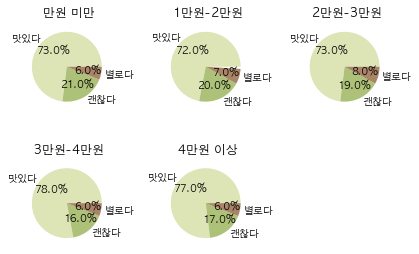

In [44]:

labels=['맛있다','괜찮다','별로다']
colors = ["#dde5b6", "#adc178", "#a98467"]


#만원 미만
plt.subplot(231)
ratio=a_list
plt.title(' 만원 미만')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)

#만원 미만
plt.subplot(232)
ratio=f_list
plt.title(' 1만원-2만원')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)


#2만원-3만원
plt.subplot(233)
ratio=b_list
plt.title(' 2만원-3만원')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)


#3만원-4만원
plt.subplot(234)
ratio=d_list
plt.title(' 3만원-4만원')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)

#4만원 이상
plt.subplot(235)
ratio=c_list
plt.title(' 4만원 이상')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)


plt.tight_layout(pad=1.5)

### 시각화2: 가격대별 맛집의 평균 평점 비교



In [45]:

#가격대 평균 평점

a=df['가격대']==' 만원 미만'
a_m=df[a]['최종평점'].mean()

b=df['가격대']==' 만원-2만원'
b_m=df[b]['최종평점'].mean()

c=df['가격대']==' 2만원-3만원'
c_m=df[c]['최종평점'].mean()

d=df['가격대']==' 4만원 이상'
d_m=df[d]['최종평점'].mean()

e=df['가격대']==' 3만원-4만원'
e_m=df[e]['최종평점'].mean()



bar_list=[a_m,b_m,c_m,e_m,d_m]

bar_list

[1.763444501211405,
 1.7673898805597614,
 1.9952323646881422,
 2.343956252687885,
 2.7301523287661604]

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, '가격대별 평균 평점')

Text(0.5, 0, '가격대')

Text(0, 0.5, '맛집 평균점수')

<BarContainer object of 5 artists>

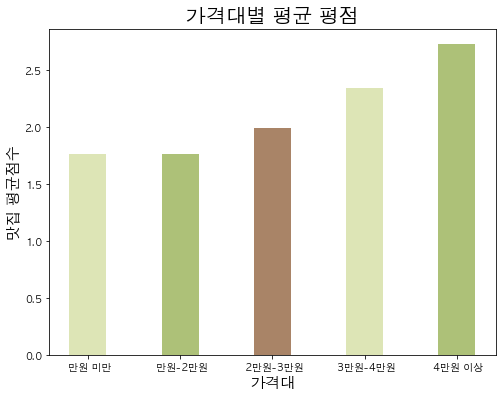

In [46]:
# #bar chart
x=[' 만원 미만', ' 만원-2만원', ' 2만원-3만원',' 3만원-4만원', ' 4만원 이상']
y=bar_list

plt.figure(figsize=(8,6))
plt.title('가격대별 평균 평점',fontsize=20)
plt.xlabel('가격대',fontsize=15)
plt.ylabel('맛집 평균점수',fontsize=15)

colors = ["#dde5b6", "#adc178", "#a98467"]
plt.bar(x,y,color=colors,width=0.4)

plt.show()

